In [5]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from ripple_heterogeneity.utils import functions,loading,add_new_deep_sup
import seaborn as sns
from tqdm import tqdm
from matplotlib.ticker import AutoMinorLocator

functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

In [2]:
df_sessions = pd.read_csv(r'Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv')

In [3]:
df = loading.load_all_cell_metrics(df_sessions.basepath.unique())

df   

,CA1depth,DS1_modulationIndex,DS1_modulationPeakResponseTime,DS1_modulationSignificanceLevel,DS2_modulationIndex,DS2_modulationPeakResponseTime,DS2_modulationSignificanceLevel,UID,ab_ratio,acg_asymptote,...,spatialPeakRate,SWR_modulationIndex,SWR_modulationPeakResponseTime,SWR_modulationSignificanceLevel,optoStim_modulationIndex,optoStim_modulationPeakResponseTime,optoStim_modulationSignificanceLevel,ripplesAll_modulationIndex,ripplesAll_modulationPeakResponseTime,ripplesAll_modulationSignificanceLevel
0,3.0,inf,0.001,0.999845,0.842105,0.072,0.994008,1,0.189795,-1.536886,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-4.0,inf,0.033,1.000000,0.562500,-0.018,0.999845,2,-0.473978,-27.743195,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-11.0,1.833333,0.004,0.999845,1.134921,0.005,0.608185,3,0.276535,0.840785,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-8.0,3.000000,0.001,1.000000,3.468750,0.010,0.000526,4,0.494590,-12.465753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-19.0,inf,0.008,1.000000,2.333333,0.025,0.177991,5,-0.026260,0.743235,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30574,0.0,NaN,NaN,NaN,NaN,NaN,NaN,114,-0.173555,3.409633,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30575,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,115,0.060465,2.768987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30576,1.0,NaN,NaN,NaN,NaN,NaN,NaN,116,-0.219719,5.294099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30577,2.0,NaN,NaN,NaN,NaN,NaN,NaN,117,0.314722,4.940983,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df = add_new_deep_sup.deep_sup_from_deepSuperficialDistance(df)


In [47]:
df.keys()[df.keys().str.contains("_WAKEepisode")]

Index(['burstIndex_WAKEepisode', 'cv2_WAKEepisode',
       'firingRateISI_WAKEepisode', 'firingRate_WAKEepisode',
       'rankorder_WAKEepisode', 'ripple_FRall_WAKEepisode',
       'ripple_FRparticip_WAKEepisode', 'ripple_GainAll_WAKEepisode',
       'ripple_GainParticip_WAKEepisode', 'ripple_nSpkParticip_WAKEepisode',
       'ripple_particip_WAKEepisode'],
      dtype='object')

Text(0, 0.5, 'Ripple Gain')

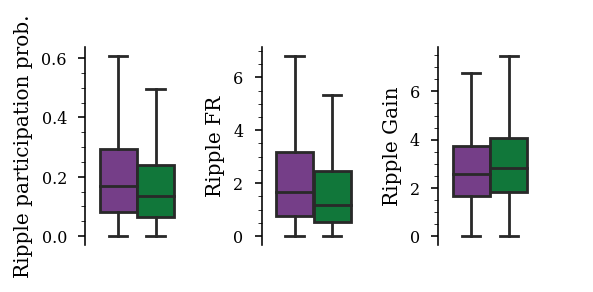

In [75]:
group_colors = {"Deep": "#7b3294", "Superficial": "#008837", "Middle": "orange"}
sns.set_palette(sns.color_palette(group_colors.values()))

fig, axs = plt.subplots(
    1,
    3,
    figsize=functions.set_size("thesis", fraction=.75, subplots=(1, 1.5)),
    edgecolor="k",
)
fig.subplots_adjust(hspace=0.1, wspace=.25)
axs = axs.ravel()

# idx = (
#     (df.deepSuperficial != "middle")
#     & (df.deepSuperficial != "Unknown")
#     & (df.brainRegion.str.contains("CA1"))
#     & df.putativeCellType.str.contains("Pyr")
#     & (df.bad_unit == False)
#     & (df.spikeCount > 200)
#     & (df.tags_bad_waveform == False)
#     & (df_sessions.basepath.str.contains("OMLproject") | df_sessions.basepath.str.contains("OR"))
# )

idx = (
    ((df.deepSuperficial=="Deep") | (df.deepSuperficial=="Superficial"))
    & (df.brainRegion.str.contains("CA1"))
    & df.putativeCellType.str.contains("Pyr")
    & (df.bad_unit == False)
    & (df.spikeCount > 200)
    & (df.tags_bad_waveform != True)
    & ~df.basepath.str.contains("OMLproject")
    & ~df.basepath.str.contains("OR")

)
df["constant"] = 1

sns.boxplot(
    x="constant",
    y="ripple_particip_WAKEepisode",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
    data=df[idx],
    ax=axs[0],
    showfliers=False,
)
sns.boxplot(
    x="constant",
    y="ripple_FRall_WAKEepisode",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
    data=df[idx],
    ax=axs[1],
    showfliers=False,
)
sns.boxplot(
    x="constant",
    y="ripple_GainAll_WAKEepisode",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
    data=df[idx],
    ax=axs[2],
    showfliers=False,
)
for i in range(3):
    axs[i].axes.get_xaxis().set_ticks([])
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())
    axs[i].spines["right"].set_visible(False)
    axs[i].spines["top"].set_visible(False)
    axs[i].spines["bottom"].set_visible(False)
    axs[i].get_legend().remove()
    axs[i].set_xlabel("")

axs[0].set_ylabel("Ripple participation prob.")
axs[1].set_ylabel("Ripple FR")
axs[2].set_ylabel("Ripple Gain")
# plt.savefig(os.path.join(fig_save_path,'ripple_features_deep_sup_wake_boxplot_v2.svg'),dpi=300,bbox_inches='tight')


In [76]:
df[idx].to_csv(r"Z:\home\ryanh\projects\ripple_heterogeneity\ripple_participation_91622.csv")

### custom colorbar for fig.3

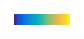

In [91]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
# For use of "viscm view"
test_cm = parula_map

plt.figure(figsize=(.5, .1))
plt.axis("off")

plt.imshow(np.linspace(0, 100, 256)[None, :], aspect='auto',
            cmap=parula_map)
plt.savefig(os.path.join(fig_save_path,'parula_colorbar.svg'),dpi=300,bbox_inches='tight')

